In [55]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns

In [56]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [57]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [58]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
train.describe()
train.fillna(train.mean(), inplace=True)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
test.describe()
test.fillna(test.mean(), inplace=True)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
data_temp = train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean()
data_temp2 = train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()
data_temp2

,Sex,Survived
0,female,0.742038
1,male,0.188908


C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


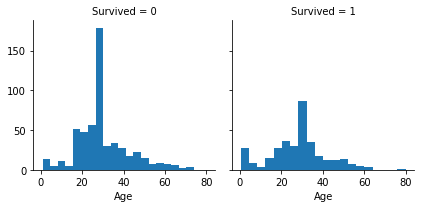

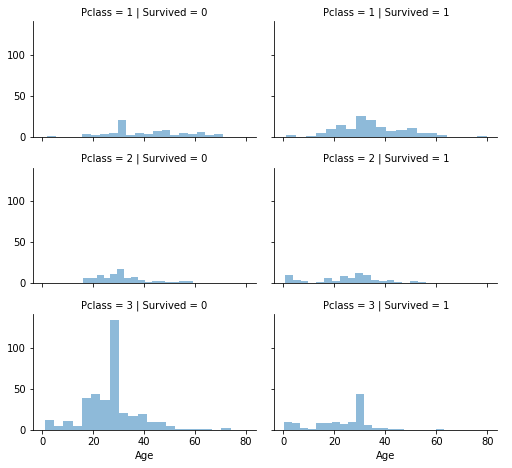

In [62]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', size = 2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins=20)
grid.add_legend()

In [72]:
train.info()
# Name, Ticket, Cabin, Embarked

test = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.1+ KB


In [64]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
5,6,0,3,male,29.699118,0,0,8.4583
6,7,0,1,male,54.000000,0,0,51.8625
7,8,0,3,male,2.000000,3,1,21.0750
8,9,1,3,female,27.000000,0,2,11.1333
9,10,1,2,female,14.000000,1,0,30.0708


In [73]:
labelSex = LabelEncoder()
labelSex.fit(train['Sex'])
labelSex.fit(test['Sex'])
train['Sex'] = labelSex.transform(train['Sex'])
test['Sex'] = labelSex.transform(test['Sex'])

In [74]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [75]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory 

In [78]:
x = np.array(test.drop(['Survived'],1).astype(float))

In [80]:

y = np.array(test['Survived'])
x.shape, y.shape

((891, 7), (891,))

In [81]:
kmeans = KMeans(n_clusters=2)

In [82]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
correct = 0
for i in range(len(x)):
    predict_m = np.array(x[i].astype(float))
    predict_m = predict_m.reshape(-1,len(predict_m))
    prediction = kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

In [85]:
print(correct/len(x))

0.49158249158249157


In [200]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [201]:
x_scaled.shape


(891, 7)

In [202]:
correct = 0
for i in range(len(x)):
    predict_m = np.array(x_scaled[i].astype(float))
    predict_m = predict_m.reshape(-1,len(predict_m))
    prediction = kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

In [203]:
print(correct/len(x))

0.6161616161616161
